In [96]:
import os
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import rcParams
import calendar
%matplotlib inline
rcParams.update({'font.size': 22})

In [128]:
yearmin, yearmax = 2013, 2016
N = 3     # N most frequent values will be plotted
figdir = '/home/ctroupin/Projects/1-Internal/20141201_QC/figures'

In [129]:
for years in range(yearmin, yearmax + 1):
    for months in range(1, 13):
        yyyy = str(years)
        mm = str(months).zfill(2)
        datafile = ("http://thredds.priv.socib.es/thredds/dodsC/mooring/"
                    "weather_station/station_parcbit-scb_met004/L1/{0}/"
                    "dep0002_station-parcbit_scb-met004_L1_{1}-{2}.nc".format(yyyy, yyyy, mm))
        figname = datafile.split('/')[-1][:-3]
        print(figname)
        
        try:
            # Load temperature form netCDF
            with netCDF4.Dataset(datafile) as nc:
                temperature = nc.variables['AIR_TEM'][:]
                temperatureQC = nc.variables['QC_AIR_TEM'][:]
                filetitle = nc.title

            # Count each occurence of the temperature values
            unique_temperature, counts = np.unique(temperature, return_counts=True)

            # Get the N most frequent values
            index_max = numpy.argsort(counts)[-N:]

            # Make the plot
            fig = plt.figure(figsize=(10, 8))
            plt.plot(unique_temperature, counts, 'ko', ms=2)
            plt.plot(unique_temperature[index_max], counts[index_max], 'ro')

            for ii in index_max:
                plt.text(unique_temperature[ii] + 0.2, counts[ii], 
                         str(np.round(unique_temperature[ii], 3)))
            plt.xlabel('Temperature ($^{\circ}$C)')
            plt.ylabel('Number of\n occurences', rotation=0, ha='right')
            plt.title(filetitle + '\n' + calendar.month_name[months] + ' ' + yyyy)
            plt.xlim(0., 30.)
            plt.savefig(os.path.join(figdir, figname), dpi=300)
            plt.close()
        except RuntimeError:
            print("File {0} doesn't exist".format(datafile))

dep0002_station-parcbit_scb-met004_L1_2012-01
File http://thredds.priv.socib.es/thredds/dodsC/mooring/weather_station/station_parcbit-scb_met004/L1/2012/dep0002_station-parcbit_scb-met004_L1_2012-01.nc doesn't exist
dep0002_station-parcbit_scb-met004_L1_2012-02
File http://thredds.priv.socib.es/thredds/dodsC/mooring/weather_station/station_parcbit-scb_met004/L1/2012/dep0002_station-parcbit_scb-met004_L1_2012-02.nc doesn't exist
dep0002_station-parcbit_scb-met004_L1_2012-03
File http://thredds.priv.socib.es/thredds/dodsC/mooring/weather_station/station_parcbit-scb_met004/L1/2012/dep0002_station-parcbit_scb-met004_L1_2012-03.nc doesn't exist
dep0002_station-parcbit_scb-met004_L1_2012-04
File http://thredds.priv.socib.es/thredds/dodsC/mooring/weather_station/station_parcbit-scb_met004/L1/2012/dep0002_station-parcbit_scb-met004_L1_2012-04.nc doesn't exist
dep0002_station-parcbit_scb-met004_L1_2012-05


KeyError: 'QC_AIR_TEM'

# Histogram

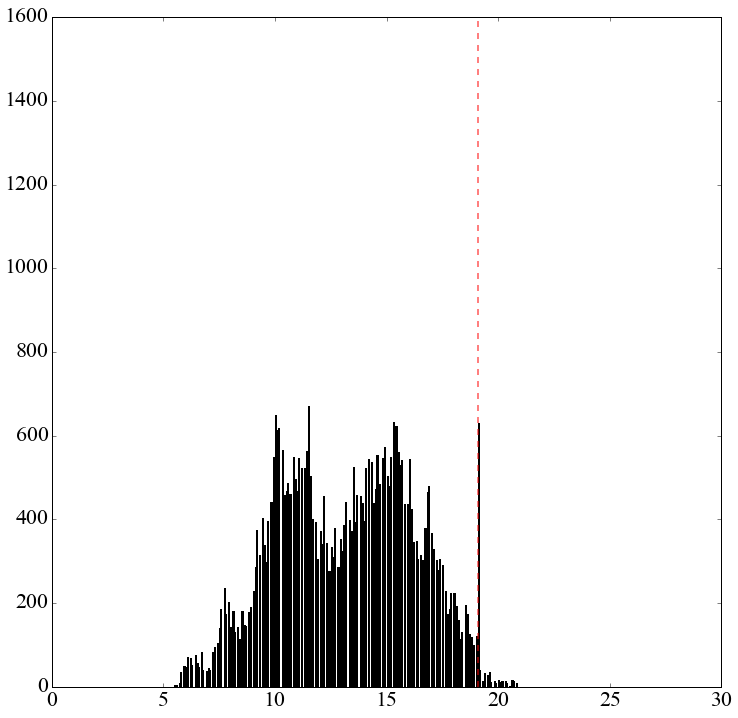

In [113]:
bins = np.arange(0, 30., 0.05)
fig = plt.figure(figsize=(12, 12))
plt.hist(temperature, bins=bins)
plt.vlines(19.1, 0., 1600., color='r', linestyle='--', alpha=0.5)
plt.show()

In [95]:
unique_temperature

array([  4.9,   5. ,   5.1,   5.2,   5.3,   5.4,   5.5,   5.6,   5.7,
         5.8,   5.9,   6. ,   6.1,   6.2,   6.3,   6.4,   6.5,   6.6,
         6.7,   6.8,   6.9,   7. ,   7.1,   7.2,   7.3,   7.4,   7.5,
         7.6,   7.7,   7.8,   7.9,   8. ,   8.1,   8.2,   8.3,   8.4,
         8.5,   8.6,   8.7,   8.8,   8.9,   9. ,   9.1,   9.2,   9.3,
         9.4,   9.5,   9.6,   9.7,   9.8,   9.9,  10. ,  10.1,  10.2,
        10.3,  10.4,  10.5,  10.6,  10.7,  10.8,  10.9,  11. ,  11.1,
        11.2,  11.3,  11.4,  11.5,  11.6,  11.7,  11.8,  11.9,  12. ,
        12.1,  12.2,  12.3,  12.4,  12.5,  12.6,  12.7,  12.8,  12.9,
        13. ,  13.1,  13.2,  13.3,  13.4,  13.5,  13.6,  13.7,  13.8,
        13.9,  14. ,  14.1,  14.2,  14.3,  14.4,  14.5,  14.6,  14.7,
        14.8,  14.9,  15. ,  15.1,  15.2,  15.3,  15.4,  15.5,  15.6,
        15.7,  15.8,  15.9,  16. ,  16.1,  16.2,  16.3,  16.4,  16.5,
        16.6,  16.7,  16.8,  16.9,  17. ,  17.1,  17.2,  17.3,  17.4,
        17.5,  17.6,